# Objective

### The objective of this project is to build a classification model that can forecast customer status and use grid search and random search to fine tune the model.

# Data Description

### The Telecom Customer Chrun dataset, which contains information about customer demographics, location, services, and current status. It is churn data for a hypothetical telecommunications company that offers phone and internet services to 7048 customers in California. 

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing the Dataset

In [2]:
# Let's import the dataset for the project

Customer_data = pd.read_csv('C:\\Users\\LENOVO USER\\Downloads\\telecom_customer_churn.csv')

# Check Top Five Rows of the Dataset

In [3]:
pd.set_option("Display.max_columns", None)

Customer_data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Check Last Five Rows of The Dataset

In [4]:
Customer_data.tail()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,63,None,No,NaN,NaN,Yes,Cable,5.0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


# Get Information About Our Dataset

In [5]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

### The data types in our dataset shows there are nine float64, six int64, and twenty-three object.

# Find The Shape of Our Dataset (Number of Rows and Columns)

In [6]:
# Let's check the shape of our dataset

Customer_data.shape

(7043, 38)

In [7]:
print('Numbers of Rows', Customer_data.shape[0])
print('Numbers of Columns', Customer_data.shape[1])

Numbers of Rows 7043
Numbers of Columns 38


### Our dataset contains 7043 rows and 38 columns.

# Check The Null Values in Our Dataset

In [8]:
Customer_data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

### There are much null values detected in our dataset which will be replaced their mode and mean values.

# Dropping Features Not Necessary For Our Prediction

In [9]:
Customer_data = Customer_data.drop('Customer ID', axis=1)

In [10]:
Customer_data = Customer_data.drop('Zip Code', axis=1)

In [11]:
Customer_data = Customer_data.drop('Latitude', axis=1)

In [12]:
Customer_data = Customer_data.drop('Longitude', axis=1)

In [13]:
# Let's check the features were dropped successfully

Customer_data.head(1)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.3,0.0,0,381.51,974.81,Stayed,NaN,NaN


# Handling Missing Values

### Mode

### Median

In [14]:
# Let's check the null values in the dataset

Customer_data.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                 

In [15]:
# Fill missing values in categorical columns with mode

Customer_data['Multiple Lines'].fillna(Customer_data['Multiple Lines'].mode()[0], inplace=True)

In [16]:
Customer_data['Internet Type'].fillna(Customer_data['Internet Type'].mode()[0], inplace=True)

In [17]:
Customer_data['Online Backup'].fillna(Customer_data['Online Backup'].mode()[0], inplace=True)

In [18]:
Customer_data['Device Protection Plan'].fillna(Customer_data['Device Protection Plan'].mode()[0], inplace=True)

In [19]:
Customer_data['Premium Tech Support'].fillna(Customer_data['Premium Tech Support'].mode()[0], inplace=True)

In [20]:
Customer_data['Streaming TV'].fillna(Customer_data['Streaming TV'].mode()[0], inplace=True)

In [21]:
Customer_data['Streaming Movies'].fillna(Customer_data['Streaming Movies'].mode()[0], inplace=True)

In [22]:
Customer_data['Streaming Music'].fillna(Customer_data['Streaming Music'].mode()[0], inplace=True)

In [23]:
Customer_data['Unlimited Data'].fillna(Customer_data['Unlimited Data'].mode()[0], inplace=True)

In [24]:
Customer_data['Churn Category'].fillna(Customer_data['Churn Category'].mode()[0], inplace=True)

In [25]:
Customer_data['Churn Reason'].fillna(Customer_data['Churn Reason'].mode()[0], inplace=True)

In [26]:
Customer_data['Online Security'].fillna(Customer_data['Online Security'].mode()[0], inplace=True)

In [27]:
# Fill missing values in numerical columns with the median because there are outliers in our data

Customer_data['Avg Monthly Long Distance Charges'].fillna(Customer_data['Avg Monthly Long Distance Charges'].median(),
                                                          inplace=True)

In [28]:
Customer_data['Avg Monthly GB Download'].fillna(Customer_data['Avg Monthly GB Download'].median(),
                                                          inplace=True)

In [29]:
# Let's check if there is missing values were successfully replaced

Customer_data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

### Our data is clean because the null values has all been replaced with their mode and mean values.

In [30]:
# Let's check for duplicates in the data

Customer_data.duplicated().sum()

0

### There is no duplicate found in our data.

# Let's Get The Statistics of the Dataset

In [31]:
Customer_data.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,25.446612,25.065455,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,13.495466,17.466342,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,14.455000,15.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


### The average age of the Telecom customers is 45 years. The minimum years is 19 and the maximum years is 80.

### The average tenure in months is 32 months. The minimum month is 1 and maximum is 72 months.

### The average monthly long distance download is 25gb. The minimum is 1gb and the maximum is 85gb.

### The average total charges 2280 dollars. The minimum total charges is 18 dollars and the maximum toatl charges is 8684 dollars.

### The average total long distance charges 749 dollars. The maxmum total long distance charges is 3564 dollars.

In [32]:
Customer_data.describe(include='object')

,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,1106,6,2,2,2,3,2,2,2,2,2,2,2,2,3,2,3,3,5,20
top,Male,No,Los Angeles,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,3555,3641,293,3877,6361,4072,5517,4561,5024,4614,4621,4999,4336,4311,4555,6271,3610,4171,3909,4720,6015,5487


### The top Telecom customer in our data is Male.

### The top city in the data is Los Angeles.

### Most customers in the data are not married.

# Exploratory Data Exploratory

# Categorical Values

In [33]:
# let’s have a look at the distribution of the Customer status column

Customer_data['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

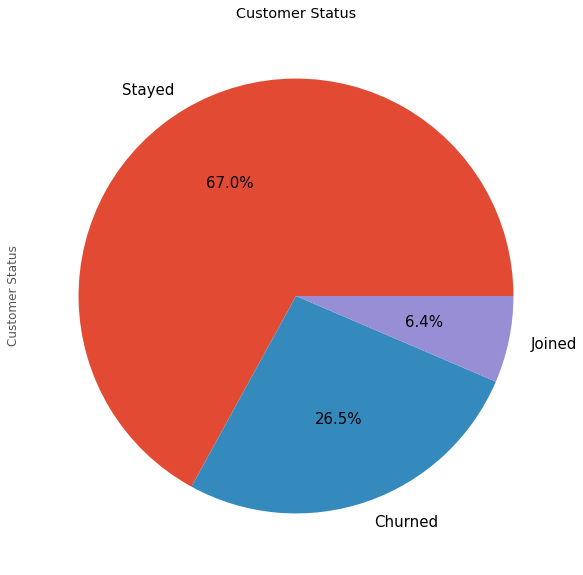

In [34]:
# Let's visualize the distribution of the Customer status column

Customer_data['Customer Status'].value_counts().plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%',
                                                     title = 'Customer Status', fontsize=15)
plt.show()

### Looking at the customer status in our data, you can clearly that 67% of the customers stayed, 6% joined and 27% of the customers left.

In [35]:
# let’s have a look at the distribution of the Payment Method column

Customer_data['Payment Method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

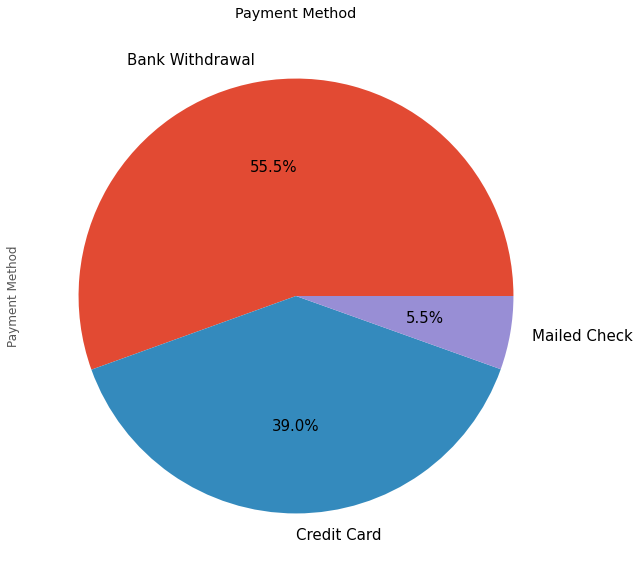

In [36]:
# Let's visualize the distribution of the Payment Method column

Customer_data['Payment Method'].value_counts().plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%',
                                                    title = 'Payment Method', fontsize=15)
plt.show()

### 56% of the customers use Bank Withdrawal as their payment method for the phone and internet services they enjoy from the Telecom company. 39% use Credit card as their payment method while 6% use Mailed Check for their payment method.

In [37]:
# let’s have a look at the distribution of the Gender column

Customer_data['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

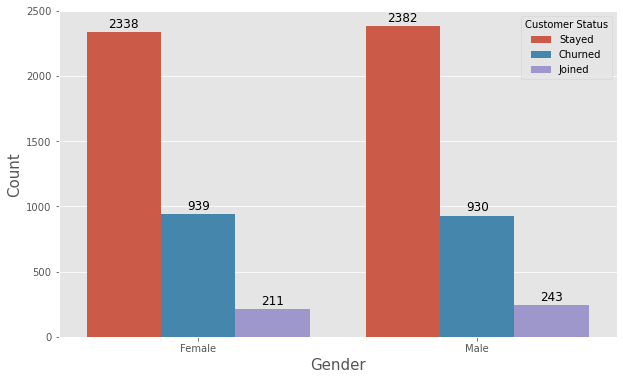

In [38]:
# Let's visualize the distribution of the Gender column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Gender', hue='Customer Status', data=Customer_data)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### Closely looking at the Gender distribution in our data, 2338, 939 and 211 females stayed, left and joined the Telecom company.

### Coming to the Male gender, 2382, 930 and 243 males stayed, left and joined the Telecom company.

In [39]:
# let’s have a look at the distribution of the Married column

Customer_data['Married'].value_counts()

No     3641
Yes    3402
Name: Married, dtype: int64

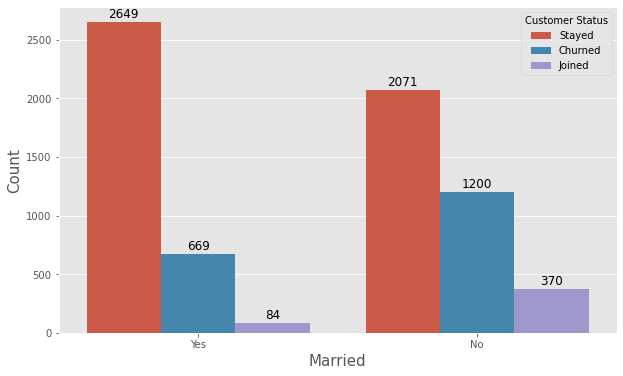

In [40]:
# Let's visualize the distribution of the Married column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Married', hue='Customer Status', data=Customer_data)
plt.xlabel('Married', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### Here, the number of the customers that are married that stayed, joined and left the Telecom company are totals 2649, 669, and 84 respectively.

### Also, the number of the customers that are not married who stayed, joined, and left the Telecom company totals the sum of 2071, 1200, and 370 respectively.

In [41]:
# let’s have a look at the distribution of the City column

Customer_data['City'].value_counts().head(5)

Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Name: City, dtype: int64

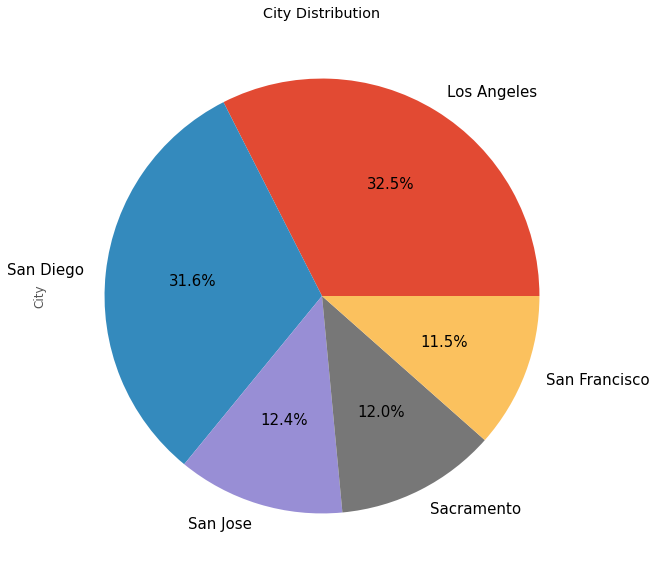

In [42]:
# Let's visualize the distribution of the City column

Customer_data['City'].value_counts().head(5).plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%',
                                                  title = 'City Distribution', fontsize=15)
plt.show()

### Los Angeles is the top city distribution in our data with 33%, followed by San Diego with 32%, San Jose, Sacramento and San Francisco with 12% each.

In [43]:
# let’s have a look at the distribution of the Internet Type column

Customer_data['Internet Type'].value_counts()

Fiber Optic    4561
DSL            1652
Cable           830
Name: Internet Type, dtype: int64

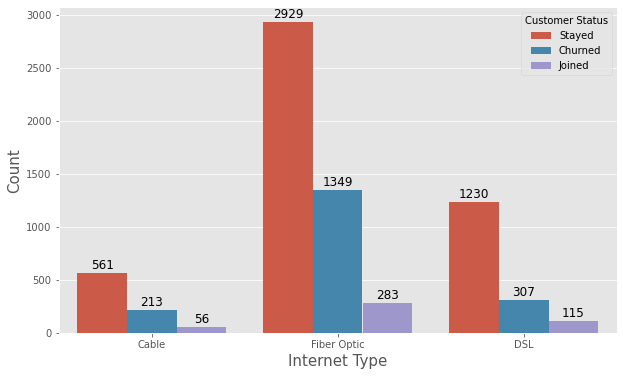

In [44]:
# Let's visualize the distribution of the Internet Type column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Internet Type', hue='Customer Status', data=Customer_data)
plt.xlabel('Internet Type', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### Here, the sum of 561 of the customers that use Cable as their Internet Type stayed at the Telecom company, 213 customers left and 56 customers joined the company.

### The sum of 2929 of the customers that use Fiber Optic as their Internet Type stayed at the Telecom company, 1349 customers left and 283 customers joined the company.

### The sum of 1230 of the customers that use DSL as their Internet Type at the Telecom company, 307 customers left and 115 customers joined the company.

In [45]:
# let’s have a look at the distribution of the Multiple Lines column

Customer_data['Multiple Lines'].value_counts()

No     4072
Yes    2971
Name: Multiple Lines, dtype: int64

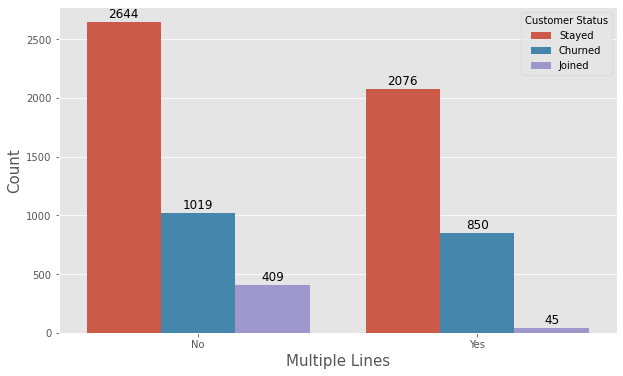

In [46]:
# Let's visualize the distribution of the Multiple Lines column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Multiple Lines', hue='Customer Status', data=Customer_data)
plt.xlabel('Multiple Lines', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### 2644 customers that don't have multiple lines stayed at the Telecom company, 1019 customers left the company, and 409 customers joined the company.

### 2076 customers that use multiple lines stayed at the Telecom company, 850 customers left the company, and 45 customers joined the company.

In [47]:
# let’s have a look at the distribution of the Phone Service column

Customer_data['Phone Service'].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

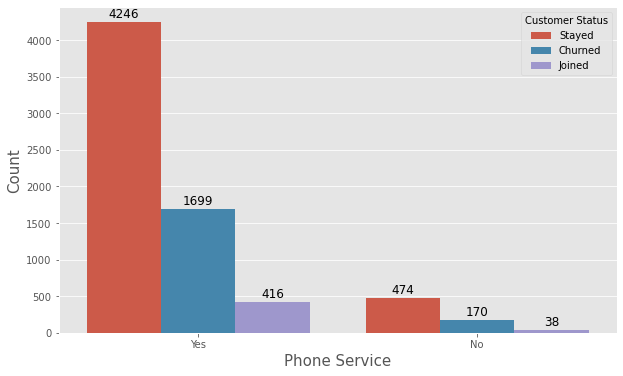

In [48]:
# Let's visualize the distribution of the Phone Service column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Phone Service', hue='Customer Status', data=Customer_data)
plt.xlabel('Phone Service', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### 4246 customers that have phone service stayed at the company, 1699 customers left the company and 416 joined the company.

### 474 customers don't have phone service stayed at the company, 170 customers left the company and 38 joined the company.

In [49]:
# let’s have a look at the distribution of the Payment Method column

Customer_data['Payment Method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

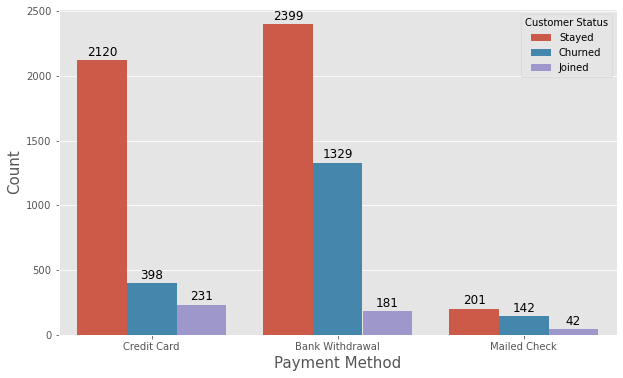

In [50]:
# Let's visualize the distribution of the Payment Method column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Payment Method', hue='Customer Status', data=Customer_data)
plt.xlabel('Payment Method', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### Here, 2120 customers that use Credit Card as their payment method stayed at the Telecom company, 398 customers left the company, and 231 customers joined the company.

### 2399 customers that use Bank Withdrawal as their payment method stayed at the company, 1329 customers left the company, and 181 joined company.

### Finally, 201 customers that use Mailed check as their payment method stayed at the company, 142 customers left the company, and 42 joined the comapny.

In [51]:
# let’s have a look at the distribution of the Contract column

Customer_data['Contract'].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

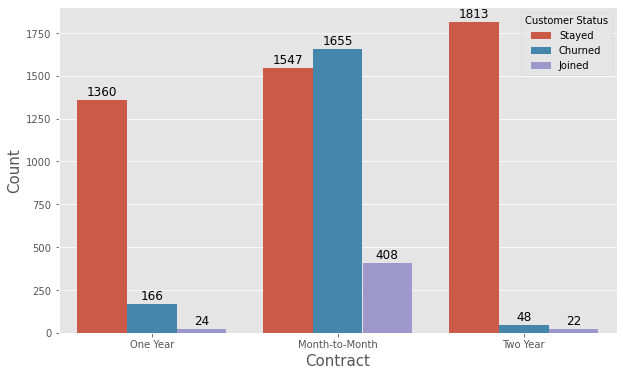

In [52]:
# Let's visualize the distribution of the Contract column

plt.figure(figsize=(10, 6))
plots = sns.countplot(x='Contract', hue='Customer Status', data=Customer_data)
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Count', fontsize=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

### There are 1360 customers that have One Year contract stayed at the company, 166 customers left the company and 24 customers joined the company.

### 1547 customers that have Month-to-Month contract stayed back at the company, 1655 customers left the company and 408 customer joined the company.

### 1813 customers that have Two Year contract stayed back at the company, 48 customers left the company and 22 customers joined the company.

In [53]:
# let’s have a look at the distribution of the Churn Category column

Customer_data['Churn Category'].value_counts()

Competitor         6015
Dissatisfaction     321
Attitude            314
Price               211
Other               182
Name: Churn Category, dtype: int64

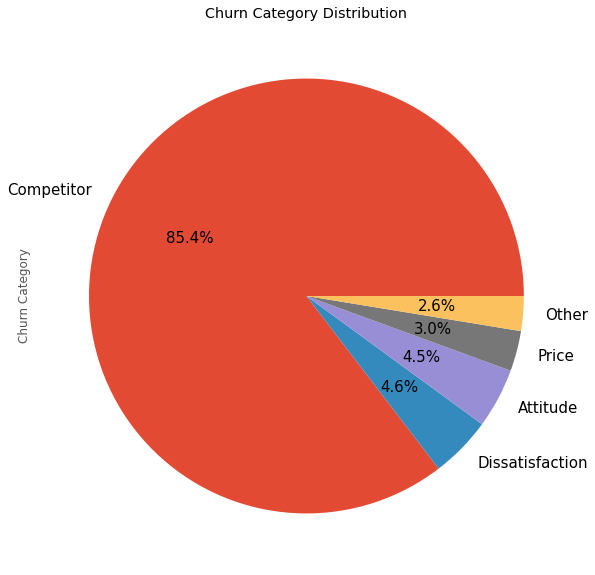

In [54]:
# Let's visualize the distribution of the City column

Customer_data['Churn Category'].value_counts().head(5).plot(kind='pie', figsize=(10,10), autopct= '%1.1f%%',
                                                            title = 'Churn Category Distribution', fontsize=15)
plt.show()

### 85% goes to the competitor churn category, 5% goes to dissatisfaction and attitude each while 3% price and other each.

In [55]:
# let’s have a look at the distribution of the Churn Reason column

Customer_data['Churn Reason'].value_counts()

Competitor had better devices                5487
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support                12
Deceased                                        6


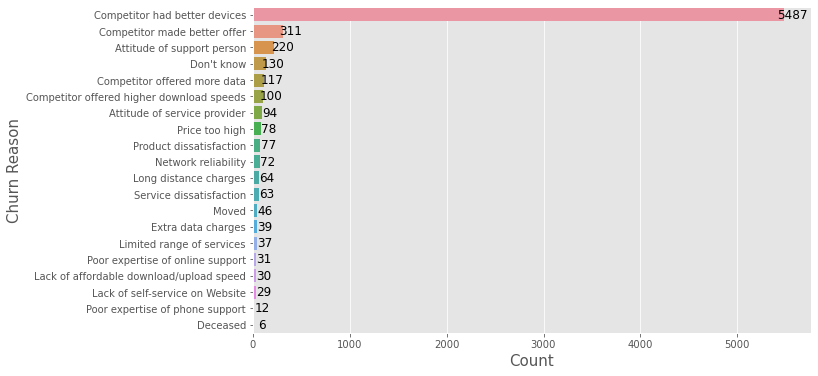

In [56]:
# Let's visualize the distribution of the Churn Reason column

plt.figure(figsize=(10, 6))
sorted_data = Customer_data['Churn Reason'].value_counts().sort_values(ascending=False)
plots = sns.countplot(y='Churn Reason', data=Customer_data, order=sorted_data.index)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Churn Reason', fontsize=15)

for bar in plots.patches:
    plots.annotate("{:.0f}".format(bar.get_width()), (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                   ha='center', va='center', size=12, xytext=(8, 0), textcoords='offset points')

plt.show()

### The main reason why the customers at the Telecom company leave the company is because competitors had better devices. Secondly, the competitors made better offer.

# Numerical Values

In [57]:
# Let's view our the data

Customer_data.head(1)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.3,0.0,0,381.51,974.81,Stayed,Competitor,Competitor had better devices


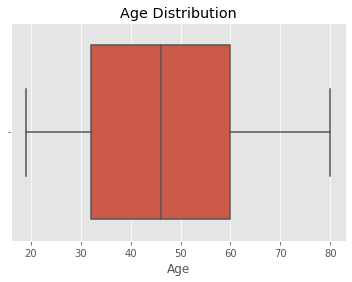

In [58]:
sns.boxplot(data=Customer_data, x='Age')
plt.title('Age Distribution')
plt.show()

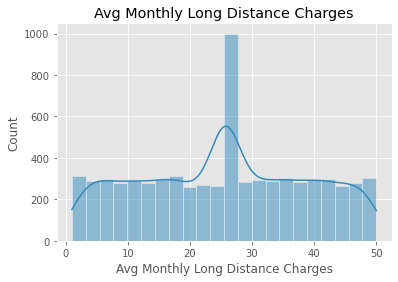

In [59]:
sns.histplot(data=Customer_data, x='Avg Monthly Long Distance Charges', kde=True)  # kde=True adds a kernel density estimate line
plt.title('Avg Monthly Long Distance Charges')
plt.show()

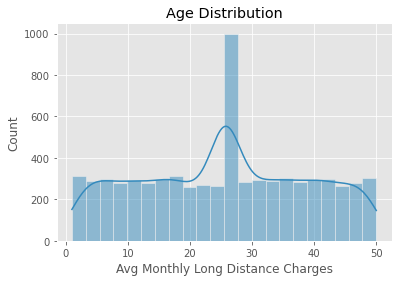

In [60]:
sns.histplot(data=Customer_data, x='Avg Monthly Long Distance Charges', kde=True)  # kde=True adds a kernel density estimate line
plt.title('Age Distribution')
plt.show()

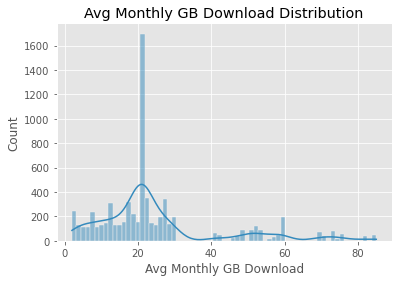

In [61]:
sns.histplot(data=Customer_data, x='Avg Monthly GB Download', kde=True)  # kde=True adds a kernel density estimate line
plt.title('Avg Monthly GB Download Distribution')
plt.show()

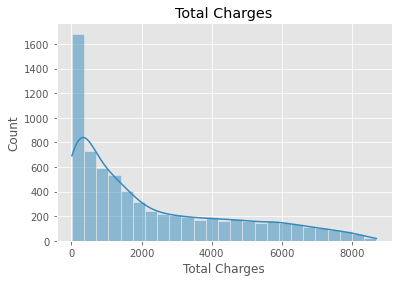

In [62]:
sns.histplot(data=Customer_data, x='Total Charges', kde=True)  # kde=True adds a kernel density estimate line
plt.title('Total Charges')
plt.show()

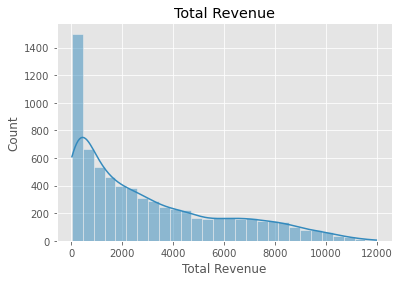

In [63]:
sns.histplot(data=Customer_data, x='Total Revenue', kde=True)  # kde=True adds a kernel density estimate line
plt.title('Total Revenue')
plt.show()

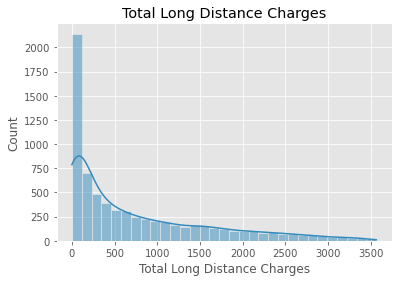

In [64]:
sns.histplot(data=Customer_data, x='Total Long Distance Charges', kde=True)  # kde=True adds a kernel density estimate line
plt.title('Total Long Distance Charges')
plt.show()

# Correlation (Positive and Negative correlation)

In [65]:
correlation = Customer_data.corr()

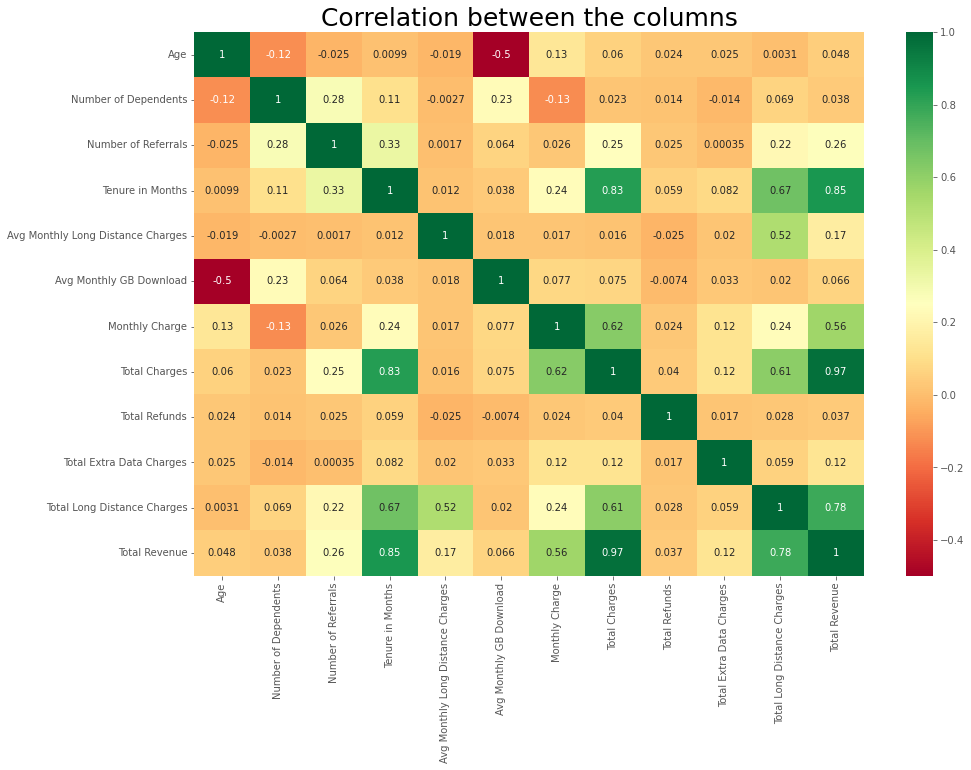

In [66]:
plt.figure(figsize = (15,10))
sns.heatmap(Customer_data.corr(), annot = True, cmap = 'RdYlGn')
plt.title('Correlation between the columns', fontsize = 25)
plt.show()

# Dropping The Features That Are Not Necessary For Our Prediction

In [67]:
# Let's view our dataset again

Customer_data.head(1)

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.3,0.0,0,381.51,974.81,Stayed,Competitor,Competitor had better devices


In [68]:
Customer_data.drop("City", axis = 1, inplace = True)

In [69]:
Customer_data.drop("Offer", axis = 1, inplace = True)

In [70]:
Customer_data.drop("Churn Reason", axis = 1, inplace = True)

In [71]:
# Let's check the features that were dropped successfully

Customer_data.head(1)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category
0,Female,37,Yes,0,2,9,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.3,0.0,0,381.51,974.81,Stayed,Competitor


# Label Encoding. The categorical values will be encoded into numerical values.

In [72]:
# Let's encode the Gender categorical values

Customer_data.replace({'Gender': {'Female' :0, 'Male' :1}}, inplace = True)

In [73]:
# Let's encode the Married categorical values

Customer_data.replace({'Married': {'Yes' :1, 'No' :0}}, inplace = True)

In [74]:
# Let's encode the Phone Services categorical values

Customer_data.replace({'Phone Service': {'Yes' :0, 'No' :1}}, inplace = True)

In [75]:
# Let's encode the Mutliple Lines categorical values

Customer_data.replace({'Multiple Lines': {'No' :1, 'Yes' :0}}, inplace = True)

In [76]:
# Let's encode the Internet Service categorical values

Customer_data.replace({'Internet Service': {'Yes' :0, 'No' :1}}, inplace = True)

In [77]:
# Let's encode the Internet Type categorical values

Customer_data.replace({'Internet Type': {'Fiber Optic' :1, 'DSL' :2, 'Cable' :3}}, inplace = True)

In [78]:
# Let's encode the Online Security categorical values

Customer_data.replace({'Online Security': {'No' :0, 'Yes' :1}}, inplace = True)

In [79]:
# Let's encode the Online Security categorical values

Customer_data.replace({'Online Backup': {'Yes' :1, 'No' :0}}, inplace = True)

In [80]:
# Let's encode the Device Protection Plan categorical values

Customer_data.replace({'Device Protection Plan': {'No' :0, 'Yes' :1}}, inplace = True)

In [81]:
# Let's encode the Premium Tech Support categorical values

Customer_data.replace({'Premium Tech Support': {'No' :1, 'Yes' :0}}, inplace = True)

In [82]:
# Let's encode the Streaming TV categorical values

Customer_data.replace({'Streaming TV': {'No' :0, 'Yes' :1}}, inplace = True)

In [83]:
# Let's encode the Streaming Movies categorical values

Customer_data.replace({'Streaming Movies': {'No' :1, 'Yes' :0}}, inplace = True)

In [84]:
# Let's encode the Streaming Music categorical values

Customer_data.replace({'Streaming Music': {'No' :0, 'Yes' :1}}, inplace = True)

In [85]:
# Let's encode the Unlimited Data categorical values

Customer_data.replace({'Unlimited Data': {'No' :1, 'Yes' :0}}, inplace = True)

In [86]:
# Let's encode the Contract categorical values

Customer_data.replace({'Contract': {'Month-to-Month' :0, 'Two Year' :1, 'One Year' :2}}, inplace = True)

In [87]:
# Let's encode the Paperless Billing categorical values

Customer_data.replace({'Paperless Billing': {'Yes' :1, 'No' :2}}, inplace = True)

In [88]:
# Let's encode the Payment Method categorical values

Customer_data.replace({'Payment Method': {'Bank Withdrawal' :0, 'Credit Card' :1, 'Mailed Check' :2}}, inplace = True)

In [89]:
# Let's encode the Customer Status categorical values

Customer_data.replace({'Customer Status': {'Stayed' :0, 'Churned' :1, 'Joined' :2}}, inplace = True)

In [90]:
# Let's encode the Churn Category categorical values

Customer_data.replace({'Churn Category': {'Competitor' :0, 'Dissatisfaction' :1, 'Attitude' :2,
                                         'Price' :3, 'Other' :4}}, inplace = True)

In [91]:
# Let's check if the categorical features were successfully encoded

Customer_data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category
0,0,37,1,0,2,9,0,42.39,1,0,3,16.0,0,1,0,0,1,1,0,0,2,1,1,65.6,593.30,0.00,0,381.51,974.81,0,0
1,1,46,0,0,0,9,0,10.69,0,0,3,10.0,0,0,0,1,0,0,1,1,0,2,1,-4.0,542.40,38.33,10,96.21,610.28,0,0
2,1,50,0,0,0,4,0,33.65,1,0,1,30.0,0,0,1,1,0,1,0,0,0,1,0,73.9,280.85,0.00,0,134.60,415.45,1,0
3,1,78,1,0,1,13,0,27.82,1,0,1,4.0,0,1,1,1,1,0,0,0,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,1,1
4,0,75,1,0,3,3,0,7.38,1,0,1,11.0,0,0,0,0,1,1,0,0,0,1,1,83.9,267.40,0.00,0,22.14,289.54,1,1


# Store Feature Variables in X and Target in Vector y

In [92]:
X = Customer_data.drop('Customer Status', axis = 1)
y = Customer_data['Customer Status']

In [93]:
# Let's view the X values

print(X)

      Gender  Age  Married  Number of Dependents  Number of Referrals  \
0          0   37        1                     0                    2   
1          1   46        0                     0                    0   
2          1   50        0                     0                    0   
3          1   78        1                     0                    1   
4          0   75        1                     0                    3   
...      ...  ...      ...                   ...                  ...   
7038       0   20        0                     0                    0   
7039       1   40        1                     0                    1   
7040       1   22        0                     0                    0   
7041       1   21        1                     0                    5   
7042       1   36        1                     0                    1   

      Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0                    9              0          

In [94]:
# Let's also view the y values

print(y)

0       0
1       0
2       1
3       1
4       1
       ..
7038    0
7039    1
7040    2
7041    0
7042    0
Name: Customer Status, Length: 7043, dtype: int64


In [95]:
# import necessary libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# let's check the shapes of x_train and x_test
print(X.shape, X_train.shape, X_test.shape)

(7043, 30) (5634, 30) (1409, 30)


In [97]:
# let's standardized the dataset
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [98]:
X_train

array([[ 0.98485028, -0.50373203,  1.0255299 , ..., -0.76409256,
        -0.93298132, -0.3663468 ],
       [ 0.98485028, -1.45312298, -0.97510565, ...,  0.97507554,
         0.55431713, -0.3663468 ],
       [-1.01538277,  0.38632199,  1.0255299 , ...,  1.9706567 ,
         1.45066647, -0.3663468 ],
       ...,
       [-1.01538277, -0.8004167 , -0.97510565, ..., -0.85141334,
        -1.01120665, -0.3663468 ],
       [ 0.98485028, -0.68174283, -0.97510565, ..., -0.86020875,
        -1.04086744, -0.3663468 ],
       [ 0.98485028, -0.26638429,  1.0255299 , ...,  1.57813538,
         0.10070667, -0.3663468 ]])

In [99]:
X_test

array([[ 0.98485028,  0.20831119, -0.97510565, ..., -0.3217189 ,
        -0.67836021, -0.3663468 ],
       [ 0.98485028, -0.38505816,  1.0255299 , ...,  0.10411941,
         1.96209203, -0.3663468 ],
       [-1.01538277, -1.21577524,  1.0255299 , ..., -0.09024731,
         1.36488796, -0.3663468 ],
       ...,
       [ 0.98485028, -0.50373203, -0.97510565, ..., -0.84854018,
        -1.01988447,  1.89805018],
       [-1.01538277,  0.32698506, -0.97510565, ..., -0.88124735,
        -0.23132754, -0.3663468 ],
       [-1.01538277,  1.03902827, -0.97510565, ...,  1.09434123,
         0.09257035, -0.3663468 ]])

In [101]:
# Create a Gradient Boosting Model
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Model: {accuracy}")

Accuracy of Model: 0.9063165365507452


# HYPERPARAMETER TUNING: GRID SEARCH

In [118]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

# Create a Grid Search CV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),
                           param_grid=param_grid,
                           cv=3, verbose=2)

In [119]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   8.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   7.7s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   3.3s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   2.0s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   4.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_est

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [50, 100]},
             verbose=2)

In [120]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters from Grid Search: {best_params}")

Best Hyperparameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [121]:
# Fit the model with the best hyperparameters to the training data
best_gbm = grid_search.best_estimator_
best_gbm.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [122]:
# Make predictions on the test data using the best model
y_pred_grid = best_gbm.predict(X_test)

In [123]:
# Calculate and print the accuracy of the tuned model
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy after Grid Search: {accuracy_grid}")

Accuracy after Grid Search: 0.9041873669268985


# HYPERPARAMETER TUNING: RANDOM SEARCH

In [124]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define distributions for hyperparameters
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': np.arange(3, 10),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=3,
                                   verbose=2,
                                   random_state=42)

In [125]:
# Fit the random search to the training data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..learning_rate=0.09, max_depth=4, n_estimators=100; total time=   4.3s
[CV] END ..learning_rate=0.09, max_depth=4, n_estimators=100; total time=   5.0s
[CV] END ..learning_rate=0.09, max_depth=4, n_estimators=100; total time=   8.3s
[CV] END ...learning_rate=0.13, max_depth=5, n_estimators=90; total time=  10.9s
[CV] END ...learning_rate=0.13, max_depth=5, n_estimators=90; total time=   6.1s
[CV] END ...learning_rate=0.13, max_depth=5, n_estimators=90; total time=   4.7s
[CV] END ..learning_rate=0.11, max_depth=8, n_estimators=100; total time=  10.2s
[CV] END ..learning_rate=0.11, max_depth=8, n_estimators=100; total time=  10.1s
[CV] END ..learning_rate=0.11, max_depth=8, n_estimators=100; total time=  10.5s
[CV] END ...learning_rate=0.11, max_depth=6, n_estimators=50; total time=   5.4s
[CV] END ...learning_rate=0.11, max_depth=6, n_estimators=50; total time=   6.8s
[CV] END ...learning_rate=0.11, max_depth=6, n_e

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, verbose=2)

In [126]:
# Get the best hyperparameters from the random search
best_params_random = random_search.best_params_
print(f"Best Hyperparameters from Random Search: {best_params_random}")

Best Hyperparameters from Random Search: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.11}


In [127]:
# Fit the model with the best hyperparameters to the training data
best_gbm_random = random_search.best_estimator_
best_gbm_random.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.11, max_depth=6, n_estimators=50)

In [128]:
# Make predictions on the test data using the best model
y_pred_random = best_gbm_random.predict(X_test)

In [129]:
# Calculate and print the accuracy of the tuned model
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy after Random Search: {accuracy_random}")

Accuracy after Random Search: 0.9041873669268985


# COMPARATIVE ANALYSIS

In [130]:
# Evaluate the model with Grid Search hyperparameters
grid_search_model = grid_search.best_estimator_
y_pred_grid = grid_search_model.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

In [131]:
# Evaluate the model with Random Search hyperparameters
random_search_model = random_search.best_estimator_
y_pred_random = random_search_model.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

In [132]:
print(f"Accuracy with Grid Search hyperparameters: {accuracy_grid:.2f}")
print(f"Accuracy with Random Search hyperparameters: {accuracy_random:.2f}")

Accuracy with Grid Search hyperparameters: 0.90
Accuracy with Random Search hyperparameters: 0.90


In [133]:
# Calculate computation time for each search method
grid_search_time = grid_search.cv_results_['mean_fit_time'].sum()
random_search_time = random_search.cv_results_['mean_fit_time'].sum()

In [134]:
print(f"Total computation time for Grid Search: {grid_search_time:.2f} seconds")
print(f"Total computation time for Random Search: {random_search_time:.2f} seconds")

Total computation time for Grid Search: 32.42 seconds
Total computation time for Random Search: 158.84 seconds
